In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import pyplot
import calendar 
import datetime
import seaborn as sns
%matplotlib inline

C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)
In C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Rajit_Sanghvi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


# Baseline model - hourly

### Importing the hourly data

In [3]:
data = pd.read_csv("../Data/processed_data.csv")
data.head()

,date,day_of_month,month,year,hour,day_of_year,day_of_week,week_of_year,call_counter
0,2017-01-01,1,1,2017,0,1,6,52,25
1,2017-01-01,1,1,2017,1,1,6,52,24
2,2017-01-01,1,1,2017,2,1,6,52,18
3,2017-01-01,1,1,2017,3,1,6,52,18
4,2017-01-01,1,1,2017,4,1,6,52,10


In [4]:
data_ = data[['date', 'hour', 'call_counter']]
data_

,date,hour,call_counter
0,2017-01-01,0,25
1,2017-01-01,1,24
2,2017-01-01,2,18
3,2017-01-01,3,18
4,2017-01-01,4,10
...,...,...,...
45059,2022-02-24,3,5
45060,2022-02-24,4,8
45061,2022-02-24,5,8
45062,2022-02-24,6,6


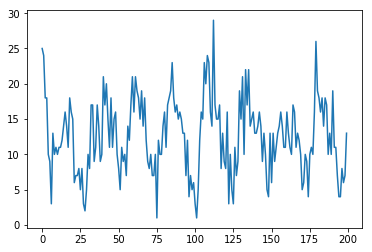

In [5]:
plt.plot(figsize=(15, 5))
plt.plot(data_.index[:200], data_['call_counter'][:200])

# Persistence Algorithm

A baseline in performance gives us an idea of how well all other models will actually perform on our problem.

The equivalent technique for use with time series dataset is the persistence algorithm. The persistence algorithm uses the value at the previous time step (t-1) to predict the expected outcome at the next time step (t+1).

1. Transform the univariate dataset into a supervised learning problem.
2. Establish the train and test datasets for the test harness.
3. Define the persistence model.
4. Make a forecast and establish a baseline performance.

In [6]:
# Create lagged dataset
values = pd.DataFrame(data_.call_counter)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

    t-1  t+1
0   NaN   25
1  25.0   24
2  24.0   18
3  18.0   18
4  18.0   10


# Splitting the Data


**There is no actual training**

In [7]:
X = dataframe.values

train_size = int(len(X) * 0.66)

train, test = X[1:train_size], X[train_size:]

train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [8]:
# persistence model
def model_persistence(x):
    return x

In [9]:
from sklearn.metrics import mean_squared_error

predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % test_score)

Test RMSE: 5.008


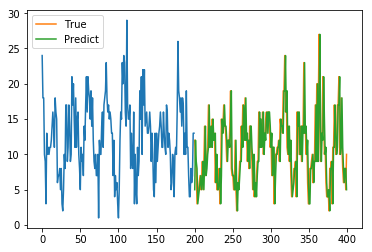

In [11]:
# plot predictions and expected results
pyplot.plot(train_y[:200])
pyplot.plot([None for i in train_y][:200] + [x for x in test_y][:200], label = 'True')
pyplot.plot([None for i in train_y][:200] + [x for x in predictions][:200], label = 'Predict')
pyplot.legend()
pyplot.show()

# Baseline model - monthly

### Importing the monthly data

In [12]:
data = pd.read_csv("../Data/monthly_data.csv")
data.head()

,year,month,call_counter
0,2017,1,8712
1,2017,2,7633
2,2017,3,8304
3,2017,4,8046
4,2017,5,8880


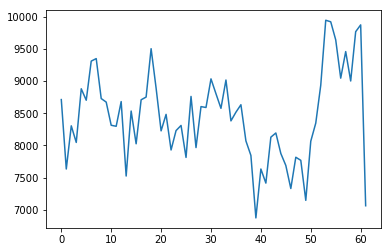

In [13]:
plt.plot(figsize=(15, 5))
plt.plot(data.index[:200], data['call_counter'][:200])

In [14]:
# Create lagged dataset
values = pd.DataFrame(data.call_counter)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

      t-1   t+1
0     NaN  8712
1  8712.0  7633
2  7633.0  8304
3  8304.0  8046
4  8046.0  8880


In [15]:
X = dataframe.values

train_size = int(len(X) * 0.66)

train, test = X[1:train_size], X[train_size:]

train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [16]:
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % test_score)

Test RMSE: 787.191


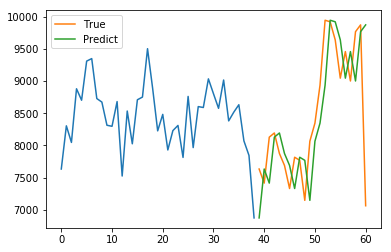

In [21]:
# plot True vs predictions and expected results for 2021 and 2022
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y], label = 'True')
pyplot.plot([None for i in train_y] + [x for x in predictions], label = 'Predict')
pyplot.legend()
pyplot.show()

Persistence Algorithm captures the seasonality very well and there is a good fit between true and predicted values but it has its own limitation as it uses only the last measured value to predict the next value, and would not be able to predict the future value well.

### End of Notebook